In [87]:
#TSNE primo esercizio
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sn

sn.set_style('darkgrid')
sn.set_palette('muted')
sn.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [33]:
iris = load_iris()
samples = iris.data
species = iris.target

In [35]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(samples) 

tsne_data = np.vstack((tsne_data.T , species)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dimensione_1", "Dimensione_2", "label"))

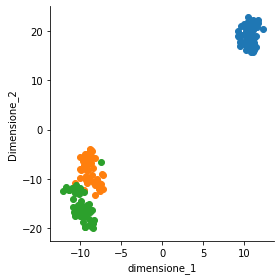

In [39]:
sn.FacetGrid(tsne_df, hue="label", height=4).map(plt.scatter, 'dimensione_1', 'Dimensione_2')
plt.show()

In [78]:
# funzione utile per visualizzare pca e t-SNE
import matplotlib.patheffects as PathEffects

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sn.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [79]:
from sklearn.datasets import load_iris

In [80]:
iris = load_iris()
X = iris.data
y = iris.target

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#nomalizzo i dati
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [97]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_train)

In [98]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))


Variance explained per principal component: [0.71806894 0.24442204 0.0333455  0.00416351]


In [93]:
#le prime due dimensioni sono le piu significative e unite hanno piu' del 90 della varianza%

(<Figure size 576x576 with 1 Axes>,
 [Text(-2.2021251791531014, 0.27781354622941873, '0'),
  Text(0.18465897616350946, -0.5957672254919388, '1'),
  Text(1.646359476417227, 0.17978779008284004, '2')])

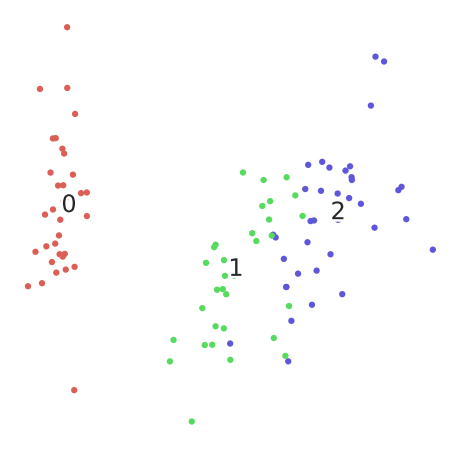

In [100]:
#prendo le prime due dimensioni
top_two_comp = pca_df[['pca1','pca2']] 

#visualizzo l'output di pca
fashion_scatter(top_two_comp.values,y_train)


In [121]:
#facciamo la stessa cosa ma con T-SNE
from sklearn.manifold import TSNE

fashion_tsne = TSNE(random_state=RS, perplexity=10).fit_transform(X_train)

(<Figure size 576x576 with 1 Axes>,
 [Text(-45.227478, -8.594318, '0'),
  Text(5.878744, 5.236182, '1'),
  Text(28.220325, -2.8727741, '2')])

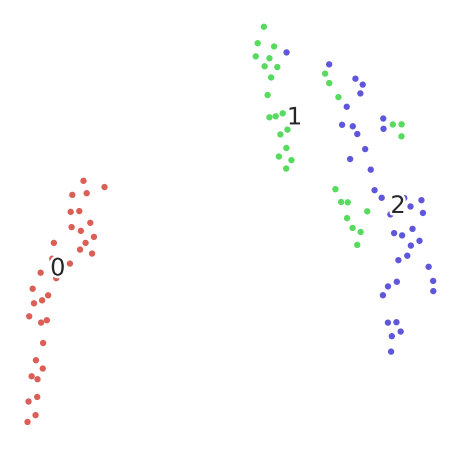

In [122]:
fashion_scatter(fashion_tsne, y_train)

In [ ]:
#usando T-SNE con un perplexity di 10 riesco a visualizzare meglio i dati rispetto a PCA